# Análisis Predictivo para una Tienda Minorista 

### Objetivo
Desarrollar un **modelo predictivo** para una **tienda minorista** que desea pronosticar las ventas basándose en diversas características. La tienda ha estado recopilando datos sobre las ventas diarias y quiere utilizar esta información para tomar decisiones informadas sobre la *gestión de inventario*, *promociones* y *programación de personal*.

Construir un modelo que pueda **predecir el total de ventas para el próximo mes**, utilizando datos de los meses anteriores.

### Tarea
**1. Preparación de Datos**
- Cargar el conjunto de datos y realizar cualquier preprocesamiento necesario, como manejar **valores faltantes**, selección de **variables dependientes e independientes**, y dividir los datos en **conjuntos de entrenamiento** y **prueba**.

**2. Análisis Exploratorio de Datos (EDA)**
- Realiza un EDA para entender la distribución de las ventas y la relación entre las ventas y otras características. Esto podría incluir trazar las ventas a lo largo del tiempo, analizar las ventas en *festivos* vs. *no festivos* y el impacto de las promociones.

**3. Selección de Modelo**
- Elegir el modelo más adecuado para esta tarea. Considerar la **Regresión Lineal**, los **Árboles de Decisión**, y los **Bosques Aleatorios**.

**4. Entrenamiento y Evaluación del Modelo**
- Entrenar el modelo seleccionado en el conjunto de entrenamiento y evaluar su rendimiento utilizando el conjunto de prueba. Utilizar gráficos para visualizar las *ventas reales* vs. *las predichas*.

**5. Conclusión**
- Basado en los resultados iniciales, resumir los hallazgos y realizar recomendaciones para la tienda minorista sobre cómo utilizar el análisis predictivo para una mejor toma de decisiones.

## 1. Preparación de datos

In [2]:
# Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
# Definir la ruta del dataset
ruta = "C:/Users/tomor/OneDrive/Documentos/Programacion/Python para Data Science & Machine Learning/Proyectos/Machine_Learning/Análisis Predictivo para una Tienda Minorista/Ventas.csv"

# Cargar el dataset
df = pd.read_csv(ruta)
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [4]:
# Comprobar si hay valores faltantes
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Fecha          365 non-null    object
 1   DíaDeLaSemana  365 non-null    int64 
 2   Promociones    365 non-null    int64 
 3   Festivo        365 non-null    int64 
 4   Ventas         365 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 14.4+ KB


In [5]:
# Convertir la columna 'Fecha' a tipo datetime
df['Fecha'] = pd.to_datetime(df['Fecha'])
df.head()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
0,2022-01-01,6,0,0,4033
1,2022-01-02,7,0,1,4012
2,2022-01-03,1,0,0,1608
3,2022-01-04,2,1,0,2046
4,2022-01-05,3,0,0,2484


In [6]:
escala = MinMaxScaler(feature_range=(0, 1))

# Eliminamos las columnas no deseadas y guardamos los nombres de las columnas que vamos a escalar
columnas_para_escalar = df.drop(["Ventas", "Fecha"], axis=1).columns

# Ajustamos el MinMaxScaler a las columnas restantes y transformamos los datos
normado = escala.fit_transform(df[columnas_para_escalar])

# Creamos un nuevo DataFrame con los datos normalizados y las columnas correctas
df_normado = pd.DataFrame(data=normado, columns=columnas_para_escalar)

# Agregar las columnas no escaladas que has quitado previamente
df_normado["Ventas"] = df["Ventas"]
df_normado["Fecha"] = df["Fecha"]

# Ahora df_normado tiene los datos normalizados y las columnas no normalizadas originales
df_normado.head()

,DíaDeLaSemana,Promociones,Festivo,Ventas,Fecha
0,0.833333,0.0,0.0,4033,2022-01-01
1,1.000000,0.0,1.0,4012,2022-01-02
2,0.000000,0.0,0.0,1608,2022-01-03
3,0.166667,1.0,0.0,2046,2022-01-04
4,0.333333,0.0,0.0,2484,2022-01-05


In [7]:
# Comprobación del tipo de dato de Fecha
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Fecha          365 non-null    datetime64[ns]
 1   DíaDeLaSemana  365 non-null    int64         
 2   Promociones    365 non-null    int64         
 3   Festivo        365 non-null    int64         
 4   Ventas         365 non-null    int64         
dtypes: datetime64[ns](1), int64(4)
memory usage: 14.4 KB


In [8]:
# Identificar las variables dependientes e independientes
X = df_normado.drop(['Ventas', 'Fecha'], axis=1)
y = df['Ventas']

In [9]:
# Dividir en conjuntos de entrenamiento y prueba
X_entrena, X_prueba, y_entrena, y_prueba = train_test_split(X, y, train_size=0.8, random_state=42)

## 2. Análisis Exploratorio de Datos (EDA)

In [10]:
# Estadísticas descriptivas
df.describe()

,Fecha,DíaDeLaSemana,Promociones,Festivo,Ventas
count,365,365.000000,365.000000,365.000000,365.000000
mean,2022-07-01 23:59:59.999999744,4.005479,0.200000,0.142466,2997.219178
min,2022-01-01 00:00:00,1.000000,0.000000,0.000000,1305.000000
25%,2022-04-02 00:00:00,2.000000,0.000000,0.000000,2195.000000
50%,2022-07-02 00:00:00,4.000000,0.000000,0.000000,3074.000000
75%,2022-10-01 00:00:00,6.000000,0.000000,0.000000,3979.000000
max,2022-12-31 00:00:00,7.000000,1.000000,1.000000,4404.000000
std,NaN,2.002738,0.400549,0.350007,942.096284


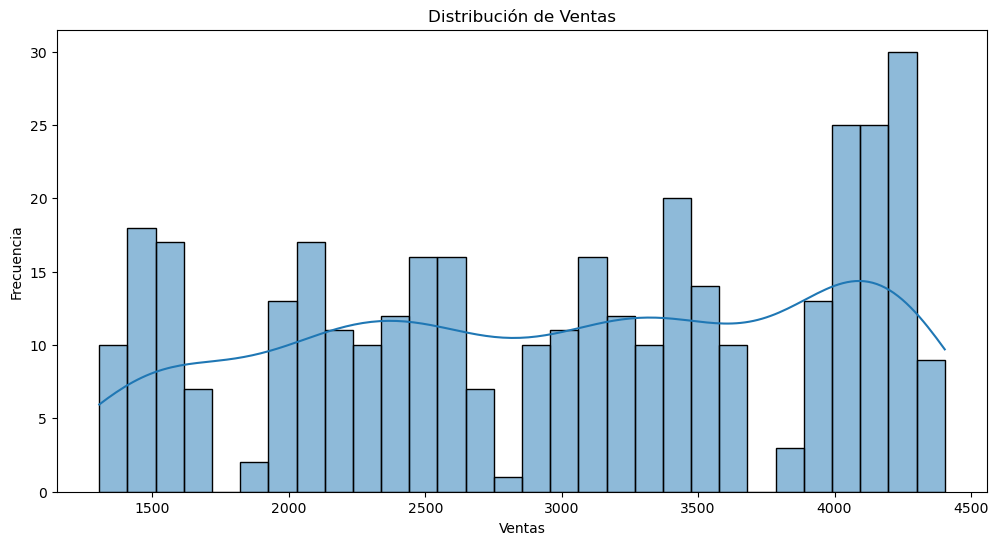

In [11]:
# Visualización de la distribución de ventas
plt.figure(figsize=(12, 6))
sns.histplot(df['Ventas'], bins=30, kde=True)
plt.title('Distribución de Ventas')
plt.xlabel('Ventas')
plt.ylabel('Frecuencia');

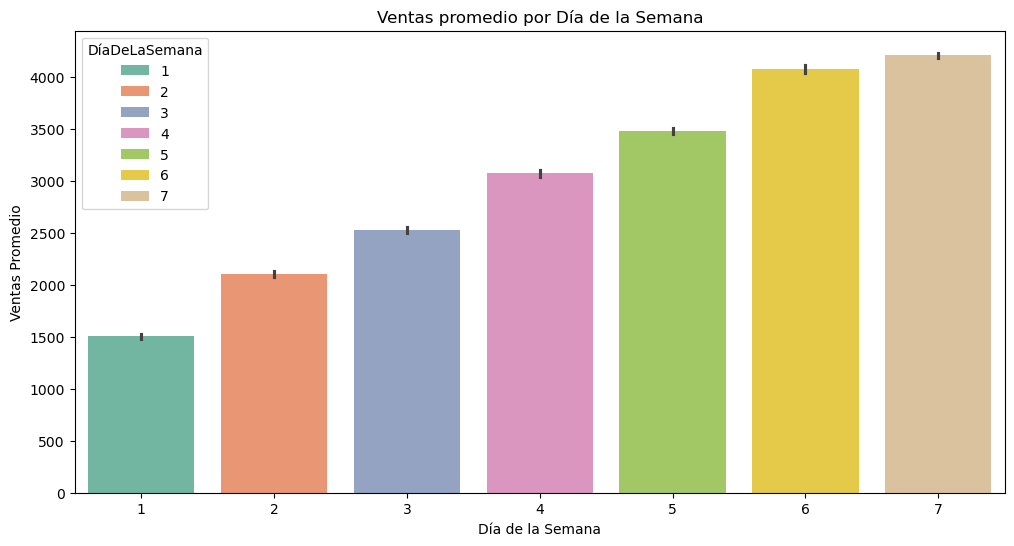

In [14]:
# Relación entre ventas y día de la semana con promedio de ventas
plt.figure(figsize=(12, 6))
sns.barplot(data=df, x='DíaDeLaSemana', y='Ventas', hue='DíaDeLaSemana', palette='Set2')
plt.title('Ventas promedio por Día de la Semana')
plt.xlabel('Día de la Semana')
plt.ylabel('Ventas Promedio');

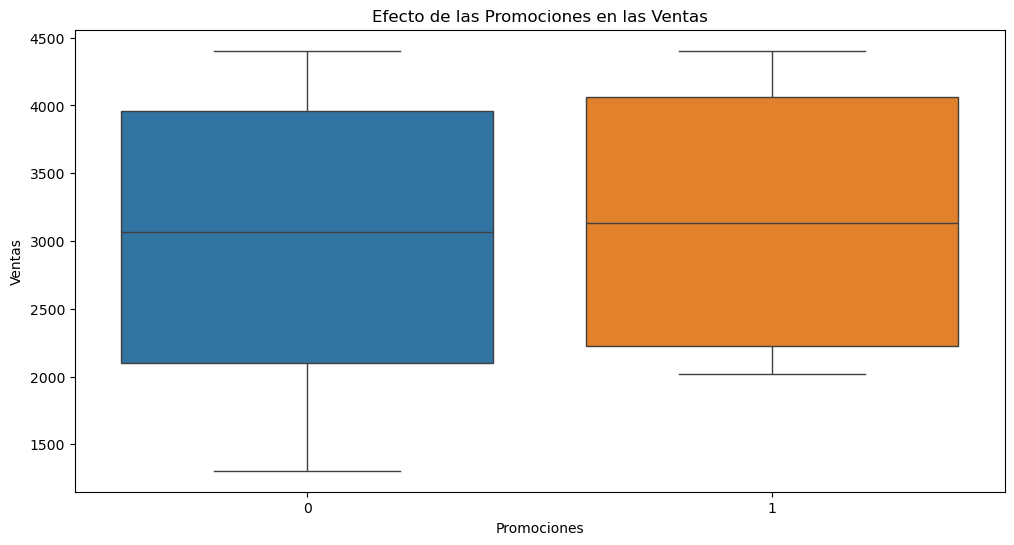

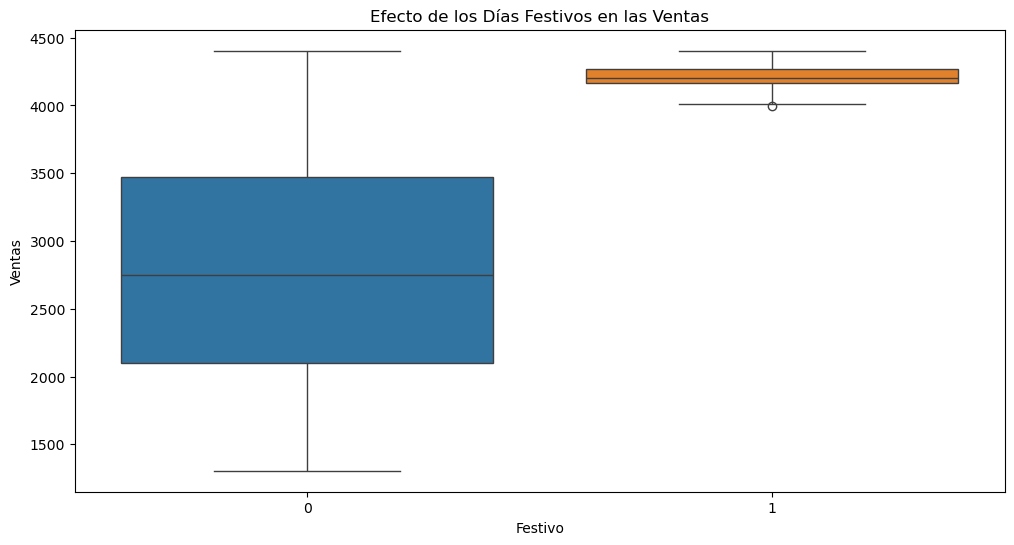

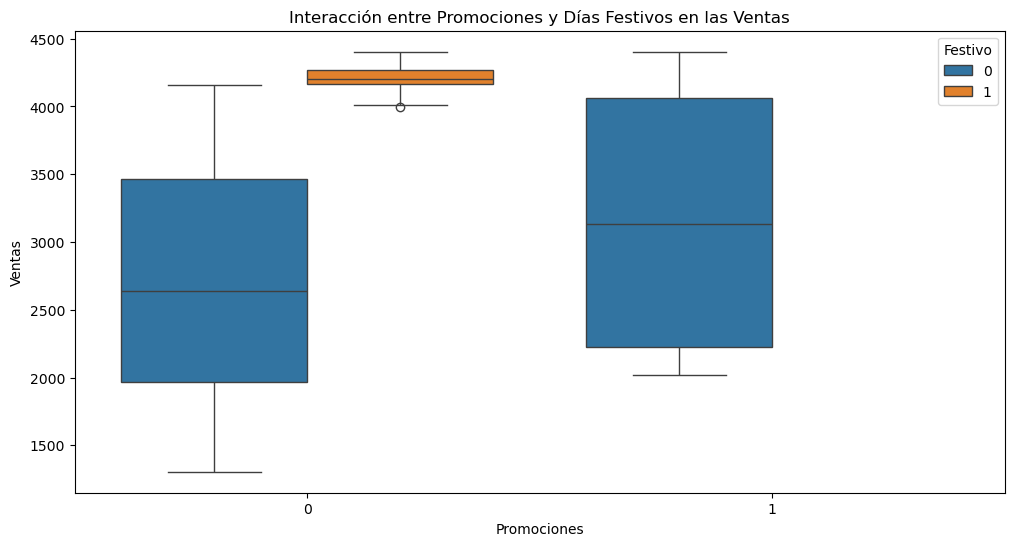

In [21]:
# boxplot para comparar las ventas con y sin promociones.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', data=df, hue='Promociones', legend=False)
plt.title('Efecto de las Promociones en las Ventas')

# boxplot para comparar las ventas para los días normales y festivos.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Festivo', y='Ventas', data=df, hue='Festivo', legend=False)
plt.title('Efecto de los Días Festivos en las Ventas')

# boxplot para ver la interacción entre promociones y días festivos en las ventas.
plt.figure(figsize=(12, 6))
sns.boxplot(x='Promociones', y='Ventas', hue='Festivo', data=df)
plt.title('Interacción entre Promociones y Días Festivos en las Ventas');

## 3. Selección de modelo

In [22]:
# almacenar modelos
modelos = [
    ("modelo lineal", LinearRegression()),
    ("modelo arbol", DecisionTreeRegressor(random_state=42)),
    ("modelo bosque", RandomForestRegressor(random_state=42))
]

In [23]:
# Entrenar modelos y mostrar puntajes
for nombre, modelo in modelos:
    modelo.fit(X_entrena, y_entrena)
    puntaje = modelo.score(X_prueba, y_prueba)
    print(f'{nombre}: {puntaje}')

modelo lineal: 0.9924245101323563
modelo arbol: 0.9923508015371342
modelo bosque: 0.9923097376813321


## 4. Entrenamiento y evaluación del modelo

In [24]:
# Alojamos el modelo de Regresión Lineal en una variable
modelo_lineal = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
modelo_lineal.fit(X_entrena, y_entrena)

# Realizamos predicciones usando el conjunto de prueba
predicciones_lineal = modelo_lineal.predict(X_prueba)

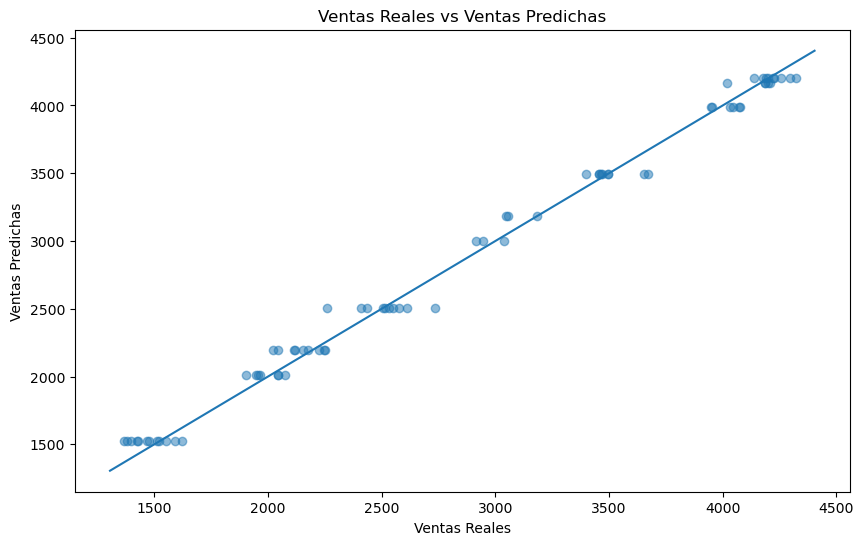

In [25]:
plt.figure(figsize=(10, 6))
plt.scatter(y_prueba, predicciones_lineal, alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()])
plt.xlabel('Ventas Reales')
plt.ylabel('Ventas Predichas')
plt.title('Ventas Reales vs Ventas Predichas');

In [17]:
df_test = pd.DataFrame({'Real': y_prueba, 'Predicho': predicciones_lineal})
df_test = df_test.sort_index()

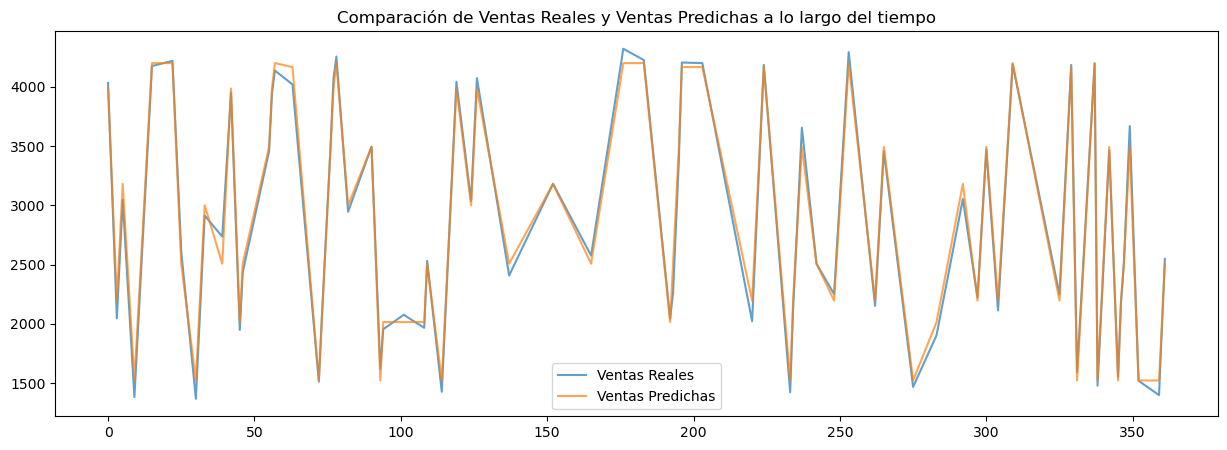

In [18]:
plt.figure(figsize=(15, 5))
plt.plot(df_test['Real'], label='Ventas Reales', alpha=0.7)
plt.plot(df_test['Predicho'], label='Ventas Predichas', alpha=0.7)
plt.legend()
plt.title('Comparación de Ventas Reales y Ventas Predichas a lo largo del tiempo');

## 5. Conclusión

1. El primer gráfico, que muestra un diagrama de dispersión de las Ventas Reales vs Ventas Predichas, sugiere que el modelo de regresión lineal está haciendo un buen trabajo al predecir las ventas. La línea de tendencia indica una fuerte relación positiva entre los valores reales y predichos, lo que es un signo prometedor de que el modelo puede capturar la tendencia de las ventas con eficacia.
2. El segundo gráfico compara las Ventas Reales y las Ventas Predichas a lo largo del tiempo y también parece seguir un patrón similar, aunque hay algunos puntos en los que las predicciones y los valores reales difieren significativamente. Esto puede deberse a eventos no capturados por las variables en tu modelo o a variaciones naturales en las ventas que no son predecibles.

Aquí hay algunas recomendaciones para la tienda minorista:
* Optimización de Inventario: Utiliza las predicciones para gestionar mejor el inventario. Las fechas festivas pueden requerir un stock adicional para evitar la falta de productos.
* Planificación de Personal: Ajusta los horarios del personal según días festivos, y no necesariamente según dias de promociones. 
* Marketing Dirigido: Si identificas patrones de cuándo las ventas son más fuertes, puedes dirigir las campañas de marketing para esos periodos y potencialmente aumentar aún más las ventas.
* Análisis de Anomalías: Investiga aquellos puntos donde hay grandes desviaciones entre las ventas reales y las predichas para entender mejor los factores no capturados por el modelo.
* Mejoras en el Modelo: Considera incluir más variables en el modelo que puedan afectar las ventas, como datos económicos generales, eventos locales, competencia, o incluso el clima.
